In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
hotel = pd.read_csv("hotel_bookings.csv")

In [3]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017


In [4]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
# So from here we get to know that company, agent, children and country has some missing values

In [6]:
year_cus = hotel.groupby("arrival_date_year").count()
year_cus["hotel"]

arrival_date_year
2015    21996
2016    56707
2017    40687
Name: hotel, dtype: int64

<BarContainer object of 3 artists>

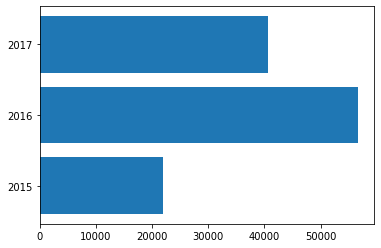

In [7]:
year_cus_1 = ["2015" , "2016" , "2017"]
plt.barh(year_cus_1 , year_cus["hotel"])

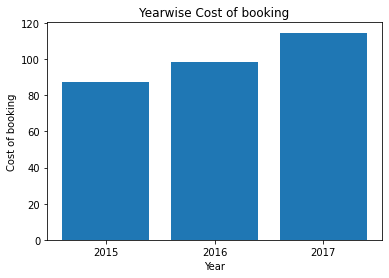

In [8]:
# Mean cost of the bookings yearwise
plt.bar(year_cus_1, hotel.groupby("arrival_date_year")["adr"].mean())
plt.title("Yearwise Cost of booking")
plt.xlabel("Year")
plt.ylabel("Cost of booking")
plt.show()

In [9]:
months_cus = hotel.groupby("arrival_date_month").count()["hotel"]
months_cus

arrival_date_month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: hotel, dtype: int64

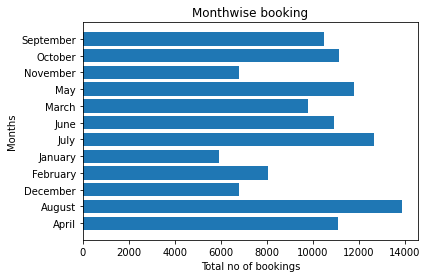

In [10]:
months_cus_1 = months_cus.index
plt.barh(months_cus_1 , months_cus)
plt.title("Monthwise booking")
plt.xlabel("Total no of bookings")
plt.ylabel("Months")
plt.show()

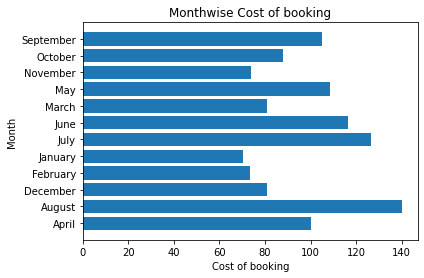

In [11]:
plt.barh(months_cus_1, hotel.groupby("arrival_date_month")["adr"].mean())
plt.title("Monthwise Cost of booking")
plt.ylabel("Month")
plt.xlabel("Cost of booking")
plt.show()

In [12]:
hotel_type = hotel.groupby("hotel").count()["is_canceled"]
hotel_type

hotel
City Hotel      79330
Resort Hotel    40060
Name: is_canceled, dtype: int64

([<matplotlib.patches.Wedge at 0x1a8f43fdd90>,
 [Text(-0.5433858480011854, 0.956416133381298, 'City Hotel'),
  Text(0.5433858480011848, -0.9564161333812983, 'Resort Hotel')])

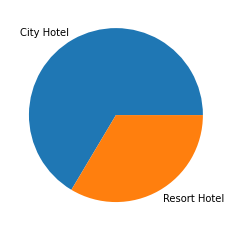

In [13]:
plt.pie(hotel_type, labels = hotel_type.index)

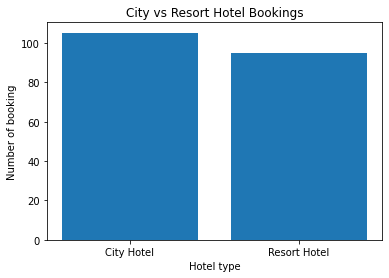

In [14]:
plt.bar(hotel_type.index, hotel.groupby("hotel")["adr"].mean())
plt.title("City vs Resort Hotel Bookings")
plt.xlabel("Hotel type")
plt.ylabel("Number of booking")
plt.show()

In [15]:
cancel = hotel.groupby("is_canceled").count()["hotel"]
cancel

is_canceled
0    75166
1    44224
Name: hotel, dtype: int64

<BarContainer object of 2 artists>

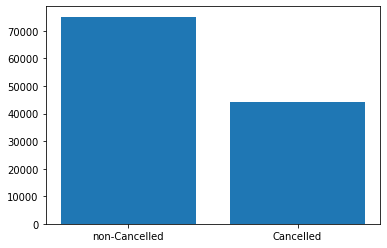

In [16]:
cancel_x = ["non-Cancelled", "Cancelled"]
plt.bar(cancel_x,cancel)

In [17]:
market_sgt = hotel.groupby("market_segment").count()["hotel"]
market_sgt

market_segment
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Undefined            2
Name: hotel, dtype: int64

<BarContainer object of 8 artists>

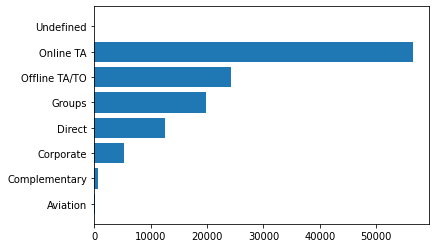

In [18]:
plt.barh(market_sgt.index, market_sgt)

In [19]:
a = hotel.groupby("is_repeated_guest").count()["hotel"]
a

is_repeated_guest
0    115580
1      3810
Name: hotel, dtype: int64

<BarContainer object of 2 artists>

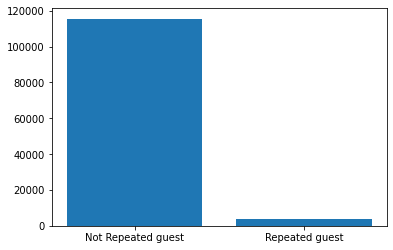

In [20]:
b = ["Not Repeated guest", "Repeated guest"]
plt.bar(b,a)